In [183]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
from datetime import datetime

In [155]:
plt.style.use('ggplot')

In [3]:
csv_path = '/Users/pranav/Documents/development/njtransit/csv'

In [7]:
week1 = ['2018_02_05', '2018_02_06', '2018_02_07', '2018_02_08', '2018_02_09', '2018_02_10', '2018_02_11']
week2 = ['2018_02_12', '2018_02_13', '2018_02_14', '2018_02_15', '2018_02_16', '2018_02_17', '2018_02_18']
week3 = ['2018_02_19', '2018_02_20', '2018_02_21', '2018_02_22', '2018_02_23'] #'2018_02_24', '2018_02_25'

In [137]:
all_days = week1 + week2 + week3

In [138]:
df = None
for day in all_days:
    day_df = pd.read_csv('{}/{}.csv'.format(csv_path, day))
    if df is None:
        df = day_df
    else:
        df = df.append(day_df, ignore_index=True)

In [139]:
def clean_delay(sec):
    if sec < 0:
        return 0
    else:
        return sec
def format_df(df):
    df['expected'] = pd.to_datetime(df['expected'])
    df['time'] = pd.to_datetime(df['time'])

    df['delay']= (df['time']-df['expected']).dt.total_seconds() #calculate delay in seconds
    df['delay']= (df['time']-df['expected']).dt.total_seconds() #calculate delay in seconds
    df['delay'] = df['delay'].apply(lambda x: clean_delay(x))/60.0 # clean delay and get delay in minutes
    df['status'] = df['status'].fillna("Estimated")
    return df

In [140]:
df = format_df(df)

In [141]:
trains = df.groupby(['train_id', 'date'])

In [142]:
trains_last = trains.last()

In [143]:
trains_last = trains_last[trains_last['type'] == 'NJ Transit'].copy()

In [144]:
trains_last

stop_sequence                 from  from_id  \
train_id date                                                      
0041     2018-02-06           25.0            Otisville    113.0   
         2018-02-08           25.0            Otisville    113.0   
         2018-02-11           25.0            Otisville    113.0   
         2018-02-13           25.0            Otisville    113.0   
         2018-02-15           25.0            Otisville    113.0   
         2018-02-19           25.0            Otisville    113.0   
         2018-02-21           25.0            Otisville    113.0   
0042     2018-02-05           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-06           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-07           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-08           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-09           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-12           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-13           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-14           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-15           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-16           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-20           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-21           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-22           18.0   Secaucus Lower Lvl  38174.0   
         2018-02-23           18.0   Secaucus Lower Lvl  38174.0   
0043     2018-02-05           12.0            Otisville    113.0   
         2018-02-06           12.0            Otisville    113.0   
         2018-02-07           12.0            Otisville    113.0   
         2018-02-08           12.0            Otisville    113.0   
         2018-02-09           12.0            Otisville    113.0   
         2018-02-12           12.0            Otisville    113.0   
         2018-02-13           12.0            Otisville    113.0   
         2018-02-14           12.0            Otisville    113.0   
         2018-02-15           12.0            Otisville    113.0   
...                            ...                  ...      ...   
7887     2018-02-19           14.0             Hamilton  32905.0   
8214     2018-02-19           16.0   Secaucus Upper Lvl  38187.0   
8225     2018-02-19           16.0        Little Silver     73.0   
8404     2018-02-19           22.0   Secaucus Upper Lvl  38187.0   
8406     2018-02-19           22.0   Secaucus Upper Lvl  38187.0   
8431     2018-02-19           20.0            Far Hills     45.0   
8433     2018-02-19           20.0            Far Hills     45.0   
8512     2018-02-19           13.0                Union  38105.0   
8551     2018-02-19           13.0           Somerville    138.0   
8800     2018-02-19           11.0   Secaucus Upper Lvl  38187.0   
8804     2018-02-19           10.0  Newark Penn Station    107.0   
8810     2018-02-19           11.0   Secaucus Upper Lvl  38187.0   
8816     2018-02-19           11.0   Secaucus Upper Lvl  38187.0   
8841     2018-02-19           10.0             Hamilton  32905.0   
8861     2018-02-19           10.0             Hamilton  32905.0   
8865     2018-02-19           10.0             Hamilton  32905.0   
8906     2018-02-19           20.0   Secaucus Upper Lvl  38187.0   
8908     2018-02-19           18.0   Secaucus Upper Lvl  38187.0   
8911     2018-02-19           20.0             Denville     34.0   
8933     2018-02-19           17.0             Denville     34.0   
9200     2018-02-19           13.0   Secaucus Upper Lvl  38187.0   
9202     2018-02-19           13.0   Secaucus Upper Lvl  38187.0   
9204     2018-02-19           13.0   Secaucus Upper Lvl  38187.0   
9225     2018-02-19           12.0    Montclair Heights     89.0   
9227     2018-02-19           12.0    Montclair Heights     89.0   
9229     2018-02-19           12.0    Montclair Heights     89.0   
9530     

In [148]:
def get_severity(delay):
    if 0 <= delay <= 2:
        return "On time"
    if 2 < delay <= 5:
        return "Delayed 3-5 min"
    if 5 < delay <= 9:
        return "Delayed 6-9 min"
    return "Delayed 10+ min"

In [149]:
trains_last['severity'] = trains_last['delay'].apply(get_severity)

In [151]:
trains_last.reset_index(level='date', inplace=True)

In [169]:
trains_last['line'].unique()

array(['Bergen Co. Line ', 'Main Line', 'Montclair-Boonton',
       'Morristown Line', 'Gladstone Branch', 'Pascack Valley',
       'No Jersey Coast', 'Raritan Valley', 'Northeast Corrdr',
       'Princeton Shuttle', 'Atl. City Line'], dtype=object)

In [224]:
def plot_severity(train_subset, subset_name):
    severity_date = train_subset.groupby(['date','severity']).size()
    severity_pcts = severity_date.groupby(level=0).apply(lambda x: x/ float(x.sum()))
    severity_pcts = severity_pcts.unstack()
    severity_pcts.fillna(0, inplace=True)
    severity_pcts['Total delayed'] = severity_pcts['Delayed 3-5 min'] + severity_pcts['Delayed 6-9 min'] + severity_pcts['Delayed 10+ min']
    print train_subset.groupby('severity').size()/float(len(train_subset))
    ax = severity_pcts.plot(figsize=(13,8), title=subset_name + " NJ Transit Performance (2/5/18 - 2/23/18)")
    ax.set_ylabel('fraction of trains')
    ax.set_xlabel('day')
    patch = patches.Rectangle((4.8, 0), 1.4, 1, facecolor="red", alpha=0.1) #weekend 2/10-2/11
    patch1 = patches.Rectangle((11.8, 0), 2.4, 1, facecolor="red", alpha=0.1) #weekend 2/17-2/19 (President's Day)
    ax.add_patch(patch)
    ax.add_patch(patch1)
    return ax

# System-wide severity

severity
Delayed 10+ min    0.050751
Delayed 3-5 min    0.174382
Delayed 6-9 min    0.052706
On time            0.722161
dtype: float64


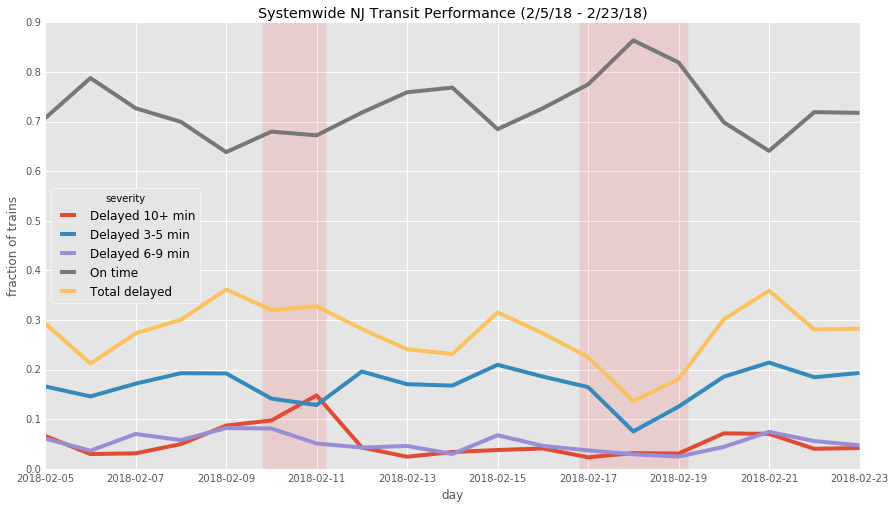

In [220]:
plot_severity(trains_last, "Systemwide")

# NEC severity

In [225]:
nec = trains_last[trains_last['line'] == 'Northeast Corrdr'].copy()

severity
Delayed 10+ min    0.078733
Delayed 3-5 min    0.138914
Delayed 6-9 min    0.058824
On time            0.723529
dtype: float64


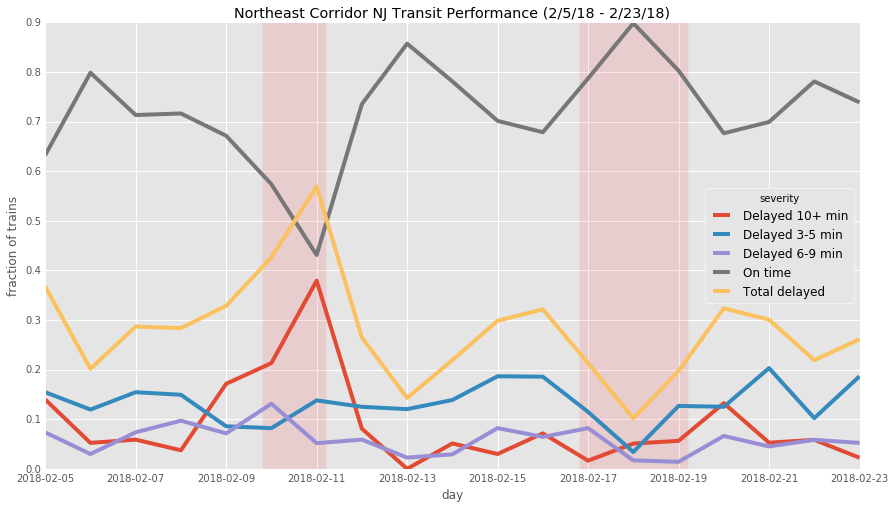

In [226]:
ax = plot_severity(nec, "Northeast Corridor")

In [227]:
ax.annotate()